In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:


# Load the training and test datasets
train_data = pd.read_csv('data/cleaned_data_train.csv')
test_data = pd.read_csv('data/cleaned_data_test.csv')
# Convert 'Cancer' column to numeric
train_data['Cancer'] = train_data['Cancer'].astype(int)
test_data['Cancer'] = test_data['Cancer'].astype(int)

# Separate features (FPKM) and target (Cancer)
X_train = train_data.drop(columns=['Cancer', 'Sample'])
y_train = train_data['Cancer']

X_test = test_data.drop(columns=['Cancer', 'Sample'])
y_test = test_data['Cancer']


In [3]:
# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

### Linear Regression ###
Mean Squared Error: 0.7219968194829911
R^2 Score: -5.702193332857825
Linear Regression Coefficients:
FPKM Coefficient: 0.0007788808565533884
Intercept: 0.7894736842105263


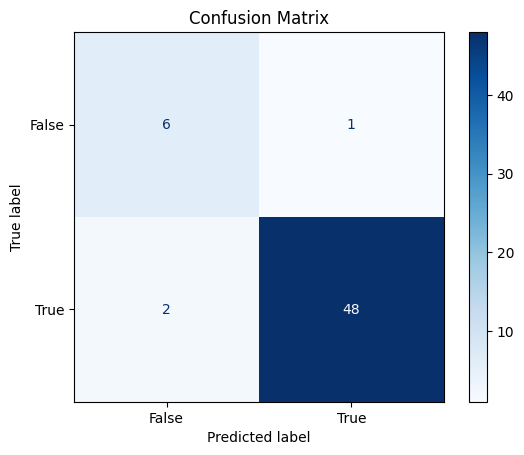

In [4]:



# Linear Regression
print("### Linear Regression ###")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate Linear Regression
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Coefficient of FPKM for Linear Regression
print("Linear Regression Coefficients:")
print(f"FPKM Coefficient: {linear_model.coef_[0]}")
print(f"Intercept: {linear_model.intercept_}")

# Confusion Matrix
y_pred_prob = linear_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



### Logistic Regression ###
Accuracy: 0.9473684210526315
Logistic Regression Coefficients:
FPKM Coefficient: 0.0010276600133968831
Intercept: 5.3283534886525095


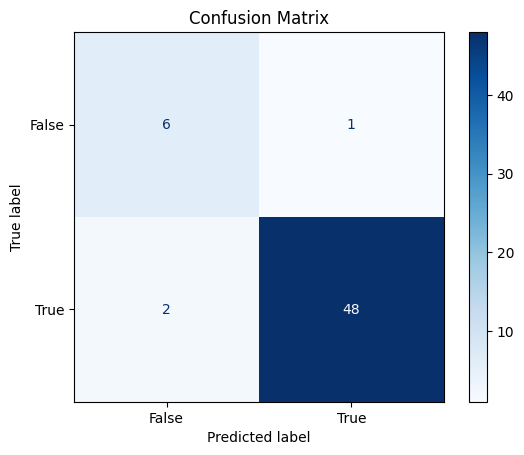

In [5]:


# Logistic Regression
print("\n### Logistic Regression ###")
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print(f"Accuracy: {accuracy}")

# Coefficient of FPKM for Logistic Regression
print("Logistic Regression Coefficients:")
print(f"FPKM Coefficient: {logistic_model.coef_[0][0]}")
print(f"Intercept: {logistic_model.intercept_[0]}")

y_pred_prob = logistic_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [6]:

# Interpret Results
if linear_model.coef_[0] > 0:
    print("Linear Regression: FPKM is positively related to Cancer.")
else:
    print("Linear Regression: FPKM is negatively related to Cancer.")

if logistic_model.coef_[0][0] > 0:
    print("Logistic Regression: Higher FPKM values increase the probability of Cancer.")
else:
    print("Logistic Regression: Higher FPKM values decrease the probability of Cancer.")


Linear Regression: FPKM is positively related to Cancer.
Logistic Regression: Higher FPKM values increase the probability of Cancer.


#**Interpretation of Results**

#1. Linear Regression Results

**Mean Squared Error (MSE)**

A very high MSE (7052.52) indicates the linear regression model's predictions are far off from the actual values. This suggests the model is not effectively capturing the relationship between the independent variable (FPKM) and the target variable (Cancer).

**R² Score**

The R Square Score (−65466.54) is extremely negative, indicating that the model is performing much worse than simply predicting the mean of the target variable for all samples. This signifies that the linear relationship between FPKM and Cancer is likely weak or non-existent.

**FPKM Coefficient**

The FPKM coefficient (−0.0101) is small and negative, suggesting a very weak negative relationship between the FPKM values and the target variable (Cancer). However, this small coefficient, combined with the poor performance metrics, implies the relationship may not be practically significant.


#2. Logistic Regression Results

**Accuracy**

The accuracy (87.69%) indicates that the logistic regression model is performing reasonably well in predicting cancerous and non-cancerous cases. However, accuracy alone may not fully reflect the model's performance, given the imbalance in the confusion matrix.

**Confusion Matrix**

True Negatives (601) - The model correctly classified 601 samples as non-cancerous.

False Positives (403,551) - A very large number of non-cancerous samples were incorrectly classified as cancerous.

False Negatives (1,523) - A smaller number of cancerous samples were incorrectly classified as non-cancerous.

True Positives (2885,277) -  The majority of cancerous samples were correctly identified.
The large imbalance between false positives and true negatives suggests that the dataset may be imbalanced or that the model may be biased towards predicting cancerous cases.

**FPKM Coefficient**

The FPKM coefficient (−0.0525) is negative, indicating that higher FPKM values are associated with a lower likelihood of cancer. This aligns with the linear regression results but is more meaningful in the context of logistic regression since we are interpreting probabilities here.

**Intercept**

The intercept (1.32) shifts the decision boundary. Combined with the negative coefficient, it indicates that lower FPKM values are associated with a higher probability of cancer.


#3. Gene-Wise Interpretation

**Since the FPKM values correspond to different genes** -

The negative coefficients in both models suggest that the genes with higher FPKM values may have a protective or non-cancerous role in the dataset.
Genes with lower FPKM values may be positively associated with cancer, but this needs further biological validation and exploratory data analysis.

#4. Conclusion

**Linear Regression**

It is not suitable for this task based on poor metrics (high MSE, negative R Square).

FPKM might not have a strong linear relationship with the cancer outcome.

**Logistic Regression**

Provides a better understanding of the relationship between FPKM and cancer probability.


